<a href="https://colab.research.google.com/github/the-faisalahmed/Optimization/blob/main/Dudeney%E2%80%99s_Tea_Mixing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
import sys
import os

if 'google.colab' in sys.modules:
    !pip install idaes-pse --pre
    !idaes get-extensions --to ./bin
    os.environ['PATH'] += ':bin'

!pip install pyomo
from pyomo.environ import *
from pyomo.opt import SolverFactory
from pyomo.util.infeasible import log_infeasible_constraints
from pyomo.opt import SolverStatus
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools
from pyomo.contrib.latex_printer import latex_printer


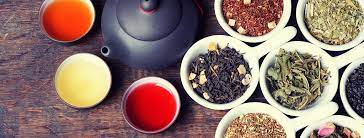

[Link](https://matmod.ch/blog/2024/01/31/dudeneys-tea-mixing-math12/) to the original problem.

Mrs. Spooner called this morning,” said the honest grocer to his assistant. “She wants twenty pounds of tea at \$2.85 per lb. Of course, we have a good tea \$3.0 per 1b, a slightly inferior at \$2.7, and a cheap tea at 2.1” “What do you propose to do?” asked the innocent assistant. “Do?” exclaimed the grocer. “Why, just mix up the three teas in different proportions so that the twenty pounds will work out fairly at the lady’s price. Just don’t put in more of the best tea than necessary, as we make less profit on that, and of course you will use only our complete pound packets. Don’t do any weighing.” How was the poor fellow able to mix the three teas? Could you have shown him how to do it?

In [2]:
def SolveModel(model, solver):
  # Solve model
  opt = SolverFactory(solver)
  result = opt.solve(model)

  if (result.solver.status == SolverStatus.ok) and \
      (result.solver.termination_condition == TerminationCondition.optimal):
      # Do something when the solution in optimal and feasible
      print('Solution is Optimal')
  elif (result.solver.termination_condition == TerminationCondition.infeasible):
      # Do something when model in infeasible
      print('Solution is Infeasible')
  else:
          # Something else is wrong
      print("Solver Status:",  result.solver.status)

  # Solve time
  print('Solve Time: ', result.solver.wallclock_time)

In [3]:
model = ConcreteModel()

model.I = ['GT','IT','CT']

model.X = Var(model.I, within = NonNegativeIntegers)
model.P = Param(model.I, initialize = {'GT': 3.0, 'IT': 2.7, 'CT': 2.1})

model.con1 = Constraint(expr = sum(model.P[i]*model.X[i] for i in model.I) == 2.85*20)

model.con2 = Constraint(expr = sum(model.X[i] for i in model.I) == 20)

model.obj = Objective(expr = model.X['GT'])

SolveModel(model, 'cbc')

Solution is Optimal
Solve Time:  0.0


In [4]:
sol = model.X.extract_values()
sol

{'GT': 10.0, 'IT': 10.0, 'CT': 0.0}